# Import Libraries

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Dataset and Creating Train/Test Split

In [2]:
from utils import train_transforms,test_transforms
train_data = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test_data = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


# Dataloader Arguments & Test/Train Dataloaders


In [3]:
SEED = 2

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True)

# train dataloader
train_loader = torch.utils.data.DataLoader(train_data,**args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test_data, **args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [4]:
# Shape of the train data
print (train_data.data.shape)
# Shape of the test data
print (test_data.data.shape)

# Number of categories in the data
print (len(train_data.classes))

(50000, 32, 32, 3)
(10000, 32, 32, 3)
10


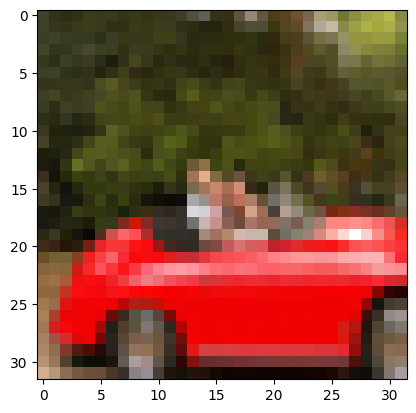

automobile


In [5]:
# Visualizing an image from train data
import matplotlib.pyplot as plt
img = train_data.data[99]
label = train_data.targets[99]

plt.imshow(img)
plt.show()

for key, value in enumerate(train_data.class_to_idx):
  if key == label:
      print (value)

In [6]:
# Model Summary
from model import Model_Norm
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model_Norm(norm_type='ln').to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
         GroupNorm-2           [-1, 16, 32, 32]              32
           Dropout-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]           2,304
         GroupNorm-5           [-1, 16, 32, 32]              32
           Dropout-6           [-1, 16, 32, 32]               0
            Conv2d-7            [-1, 8, 32, 32]             128
         MaxPool2d-8            [-1, 8, 16, 16]               0
            Conv2d-9           [-1, 24, 16, 16]           1,728
        GroupNorm-10           [-1, 24, 16, 16]              48
          Dropout-11           [-1, 24, 16, 16]               0
           Conv2d-12           [-1, 24, 16, 16]           5,184
        GroupNorm-13           [-1, 24, 16, 16]              48
          Dropout-14           [-1

In [7]:
# Training And Testing

In [8]:
from torch.optim.lr_scheduler import StepLR
from model import train,test
model =  Model_Norm(norm_type='ln').to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    scheduler.step()
    test(model, device, test_loader)

EPOCH: 0


Loss=1.5023478269577026 Batch_id=390 Accuracy=35.87: 100%|██████████| 391/391 [00:58<00:00,  6.70it/s]



Test set: Average loss: 1.6024, Accuracy: 4113/10000 (41.13%)

EPOCH: 1


Loss=1.2992668151855469 Batch_id=390 Accuracy=48.17: 100%|██████████| 391/391 [00:50<00:00,  7.73it/s]



Test set: Average loss: 1.2865, Accuracy: 5281/10000 (52.81%)

EPOCH: 2


Loss=1.240173578262329 Batch_id=390 Accuracy=52.92: 100%|██████████| 391/391 [00:52<00:00,  7.51it/s]



Test set: Average loss: 1.2211, Accuracy: 5591/10000 (55.91%)

EPOCH: 3


Loss=1.207118034362793 Batch_id=390 Accuracy=56.65: 100%|██████████| 391/391 [00:49<00:00,  7.91it/s]



Test set: Average loss: 1.1213, Accuracy: 5912/10000 (59.12%)

EPOCH: 4


Loss=1.055903434753418 Batch_id=390 Accuracy=58.95: 100%|██████████| 391/391 [00:49<00:00,  7.87it/s]



Test set: Average loss: 1.1270, Accuracy: 6065/10000 (60.65%)

EPOCH: 5


Loss=0.8403590321540833 Batch_id=390 Accuracy=60.75: 100%|██████████| 391/391 [00:48<00:00,  8.08it/s]



Test set: Average loss: 1.0728, Accuracy: 6175/10000 (61.75%)

EPOCH: 6


Loss=1.0018353462219238 Batch_id=390 Accuracy=64.44: 100%|██████████| 391/391 [00:48<00:00,  7.98it/s]



Test set: Average loss: 0.9689, Accuracy: 6517/10000 (65.17%)

EPOCH: 7


Loss=0.9021371006965637 Batch_id=390 Accuracy=65.53: 100%|██████████| 391/391 [00:49<00:00,  7.96it/s]



Test set: Average loss: 0.9493, Accuracy: 6617/10000 (66.17%)

EPOCH: 8


Loss=0.9802525639533997 Batch_id=390 Accuracy=65.58: 100%|██████████| 391/391 [00:53<00:00,  7.27it/s]



Test set: Average loss: 0.9623, Accuracy: 6543/10000 (65.43%)

EPOCH: 9


Loss=1.0011367797851562 Batch_id=390 Accuracy=65.73: 100%|██████████| 391/391 [00:49<00:00,  7.84it/s]



Test set: Average loss: 0.9450, Accuracy: 6632/10000 (66.32%)

EPOCH: 10


Loss=0.9381283521652222 Batch_id=390 Accuracy=66.13: 100%|██████████| 391/391 [00:49<00:00,  7.91it/s]



Test set: Average loss: 0.9390, Accuracy: 6639/10000 (66.39%)

EPOCH: 11


Loss=1.052497148513794 Batch_id=390 Accuracy=66.31: 100%|██████████| 391/391 [00:50<00:00,  7.72it/s]



Test set: Average loss: 0.9346, Accuracy: 6650/10000 (66.50%)

EPOCH: 12


Loss=0.8108968734741211 Batch_id=390 Accuracy=66.63: 100%|██████████| 391/391 [00:50<00:00,  7.81it/s]



Test set: Average loss: 0.9327, Accuracy: 6678/10000 (66.78%)

EPOCH: 13


Loss=0.9939063787460327 Batch_id=390 Accuracy=66.84: 100%|██████████| 391/391 [00:50<00:00,  7.77it/s]



Test set: Average loss: 0.9275, Accuracy: 6701/10000 (67.01%)

EPOCH: 14


Loss=0.8426729440689087 Batch_id=390 Accuracy=66.83: 100%|██████████| 391/391 [00:50<00:00,  7.78it/s]



Test set: Average loss: 0.9261, Accuracy: 6720/10000 (67.20%)

EPOCH: 15


Loss=0.8801358938217163 Batch_id=390 Accuracy=66.62: 100%|██████████| 391/391 [00:50<00:00,  7.77it/s]



Test set: Average loss: 0.9245, Accuracy: 6702/10000 (67.02%)

EPOCH: 16


Loss=0.8552836179733276 Batch_id=390 Accuracy=66.77: 100%|██████████| 391/391 [00:50<00:00,  7.78it/s]



Test set: Average loss: 0.9251, Accuracy: 6708/10000 (67.08%)

EPOCH: 17


Loss=0.9568058252334595 Batch_id=390 Accuracy=67.01: 100%|██████████| 391/391 [00:50<00:00,  7.79it/s]



Test set: Average loss: 0.9232, Accuracy: 6690/10000 (66.90%)

EPOCH: 18


Loss=0.8150164484977722 Batch_id=390 Accuracy=67.05: 100%|██████████| 391/391 [00:49<00:00,  7.86it/s]



Test set: Average loss: 0.9231, Accuracy: 6708/10000 (67.08%)

EPOCH: 19


Loss=1.01128089427948 Batch_id=390 Accuracy=66.86: 100%|██████████| 391/391 [00:49<00:00,  7.83it/s]



Test set: Average loss: 0.9230, Accuracy: 6720/10000 (67.20%)



In [9]:

# Wrong predictions
cnt=0
import random
data, target = next(iter(test_loader))
data, target = data.to(device), target.to(device)
output = model(data)
pred = output.argmax(dim=1, keepdim=True)
img_lst=[]
cat_lst=[]
x_lst=[]
for i in range(0,127):
  x = random.randint(0,127)

  if pred[x].item()!=target[x].item():
    img=data[x].cpu().numpy().T
    img_lst.append(img)
    cat=[value for key,value in enumerate(train_data.class_to_idx) if key==target[x].item()][0]
    cat_lst.append(cat)
    x_lst.append(x)
    cnt+=1
  if cnt>9:
    break

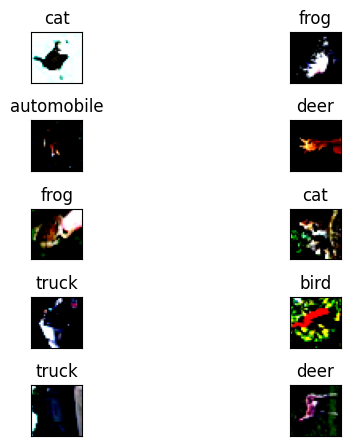

In [10]:
for i in range(10):
  plt.subplot(5,2,i+1)
  plt.tight_layout()
  plt.imshow(img_lst[i])
  plt.title(cat_lst[i])
  plt.xticks([])
  plt.yticks([])